# Clustering Analysis

## Setup and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')

# Load data
INPUT_PATH = "segmentation/data/customer_events_features.csv"
df = pd.read_csv(INPUT_PATH)

# Prepare features
features = df.drop(columns=["visitorid"]) if 'visitorid' in df.columns else df.copy()
features = features.select_dtypes(include=[np.number])

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(f"Data shape: {df.shape}")
print(f"Features for clustering: {features.shape[1]}")


Data shape: (18228, 10)
Features for clustering: 9


## Apply KMeans Clustering


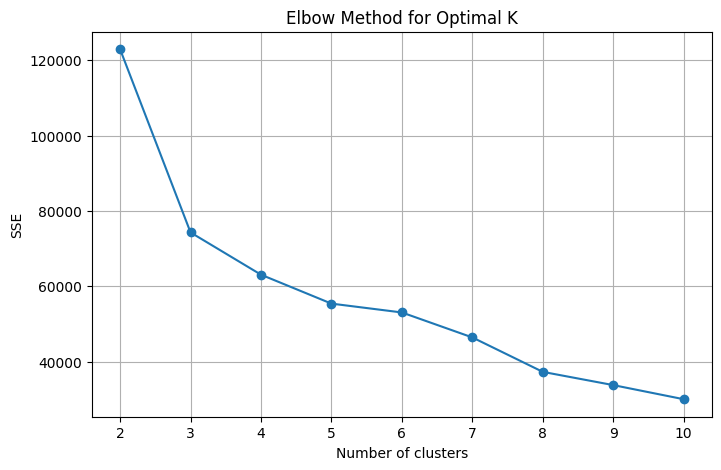

KMeans completed with 4 clusters
Silhouette Score: 0.907


In [2]:
sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

# Apply KMeans with chosen K (you can adjust this)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

print(f"KMeans completed with {optimal_k} clusters")
print(f"Silhouette Score: {silhouette_score(scaled_features, kmeans_labels):.3f}")


## Apply DBSCAN Clustering


In [3]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Results
n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN completed")
print(f"Number of clusters: {n_clusters_db}")
print(f"Number of noise points: {n_noise}")

if n_clusters_db > 1:
    print(f"Silhouette Score: {silhouette_score(scaled_features, dbscan_labels):.3f}")


DBSCAN completed
Number of clusters: 12
Number of noise points: 277
Silhouette Score: 0.843



## Visualize Segments using PCA


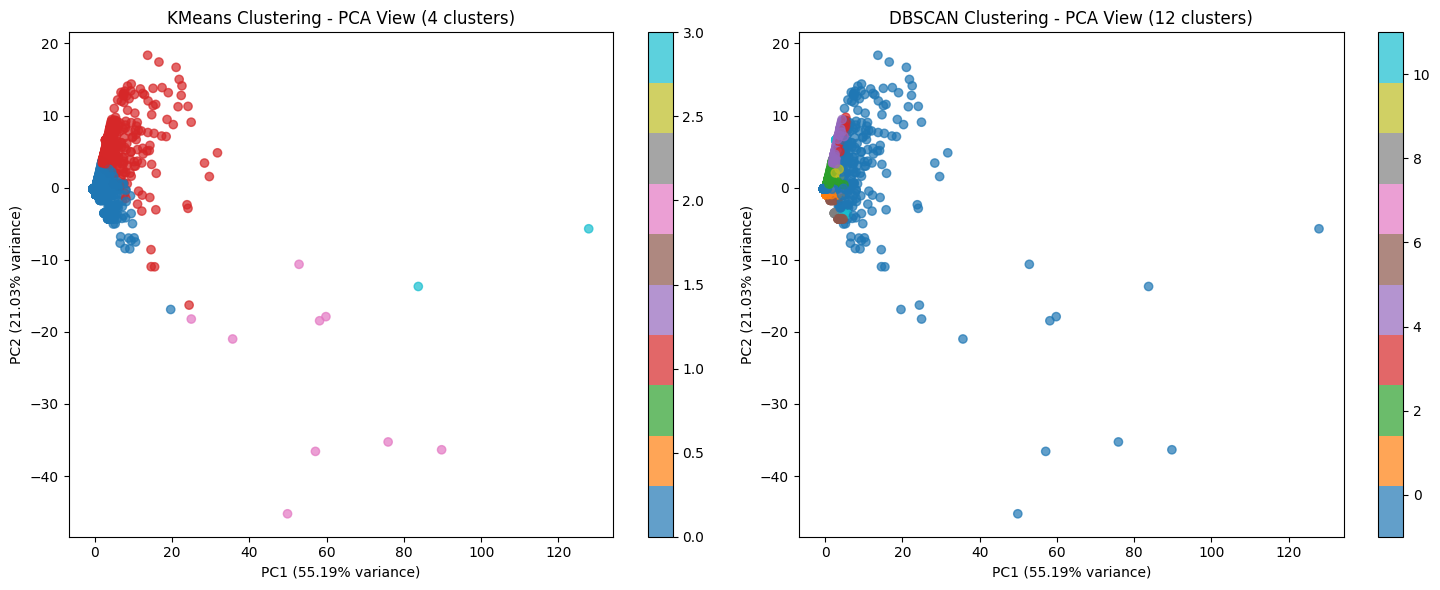

PCA explained variance: 76.22%


In [4]:
# PCA for visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_features)

# Create visualization dataframe
viz_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'KMeans': kmeans_labels,
    'DBSCAN': dbscan_labels
})

# Plot PCA results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# KMeans PCA plot
scatter1 = axes[0].scatter(viz_df['PC1'], viz_df['PC2'], c=viz_df['KMeans'], cmap='tab10', alpha=0.7)
axes[0].set_title(f'KMeans Clustering - PCA View ({optimal_k} clusters)')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter1, ax=axes[0])

# DBSCAN PCA plot
scatter2 = axes[1].scatter(viz_df['PC1'], viz_df['PC2'], c=viz_df['DBSCAN'], cmap='tab10', alpha=0.7)
axes[1].set_title(f'DBSCAN Clustering - PCA View ({n_clusters_db} clusters)')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.2%}")


## Visualize Segments using UMAP


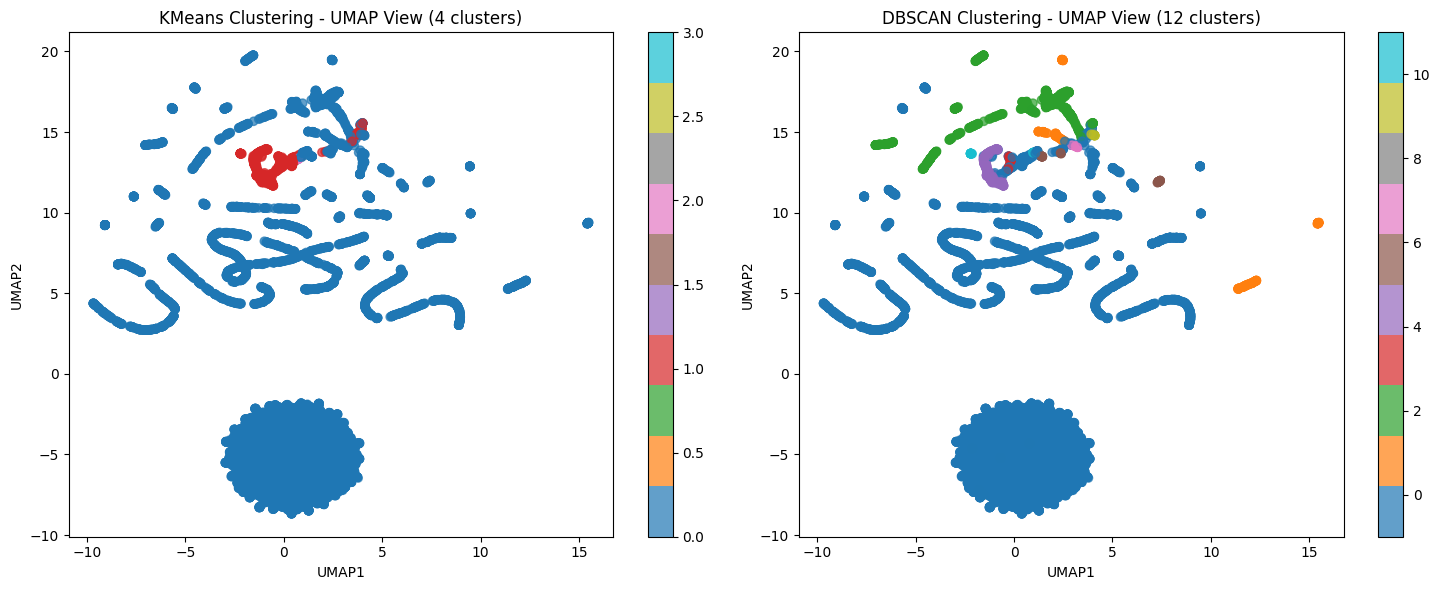

In [10]:

import umap.umap_ as umap
# UMAP for visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_features)

# Create UMAP visualization dataframe
umap_df = pd.DataFrame({
    'UMAP1': umap_result[:, 0],
    'UMAP2': umap_result[:, 1],
    'KMeans': kmeans_labels,
    'DBSCAN': dbscan_labels
})

# Plot UMAP results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# KMeans UMAP plot
scatter1 = axes[0].scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['KMeans'], cmap='tab10', alpha=0.7)
axes[0].set_title(f'KMeans Clustering - UMAP View ({optimal_k} clusters)')
axes[0].set_xlabel('UMAP1')
axes[0].set_ylabel('UMAP2')
plt.colorbar(scatter1, ax=axes[0])

# DBSCAN UMAP plot
scatter2 = axes[1].scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['DBSCAN'], cmap='tab10', alpha=0.7)
axes[1].set_title(f'DBSCAN Clustering - UMAP View ({n_clusters_db} clusters)')
axes[1].set_xlabel('UMAP1')
axes[1].set_ylabel('UMAP2')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()
